# Aprendizaje Supervisado 1: Sprit 2
*Autor: Adrián Robles Arques*


## ENUNCIADO
A partir del conjunto de datos ASI_casoPractico.csv responda a las siguientes preguntas:

* Enumere las 3 variables explicativas que presentan mayor correlación con el
target.
* Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.
* A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.
* Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.

***Objetivo de la actividad***: Aprender a ajustar el algoritmo de Naive Bayes y validar su precisión a partir de la curva ROC y el área bajo la curva.


## Parte 1
Empezamos importando las bibliotecas pertinentes y repitiendo el proceso de carga de datos tal como hicimos en el sprint 1, aunque con la mejora de crear una variable para almacenar el nombre con el que se sube el archivo, porque en ocasiones, cuando se ejecuta más de una vez, Google Colab actualiza automáticamente el nombre y esto puede hacer que falle la ejecución por si sola.

In [13]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

#LIBRERIAS PARA CARGAR DATOS EN COLAB
from google.colab import files
import io

In [14]:
# 2 - CARGA DEL FICHERO DE DATOS
#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()

Saving ASI_casoPractico.csv to ASI_casoPractico (1).csv


In [15]:
#Leemos el nombre del archivo, por si se carga varias veces.
names = []
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  names.append(fn)

User uploaded file "ASI_casoPractico (1).csv" with length 167523 bytes


In [16]:
#Leemos los datos y tenemos en cuenta que el separador es ';'
data = pd.read_csv(names[0], sep=';')
data = data.drop(["ID","b","e","DR"], axis = 1) #Eliminamos columnas innecesarias
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


## Ejercicio 1: Calculamos la matriz de correlaciones y evaluamos las 3 más correladas con la variable Target.

In [17]:
#Calculamos la matriz de correlaciones, tomamos la variable 'Target' y ordenamos
data.corr()['Target'].sort_values(ascending=False)

,Target
Target,1.000000
ASTV,0.493391
ALTV,0.489400
DP,0.340647
LBE,0.251875
Min,0.158171
DS,0.087967
Variance,0.085948
FM,0.043953
DL,-0.029696


De modo que las tres variables con mayor correlación con Target son:


1.   ASTV
2.   ALTV
3.   DP



## Ejercicio 2: Crear un conjunto de entrenamiento y otro de test con una divisón de 60-30

In [18]:
#Importamos librerías para muestreo de datos
from sklearn.model_selection import train_test_split

#Separamos la variable objetico de las variables explicativas
X_data = data.drop('Target', axis=1)
Y_data = data['Target']

#Creamos los subconjuntos
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data,
                                         Y_data, test_size=0.3, random_state=1)


Empleamos la función `train_test_split` de la librería de sklear para realizar una división aleatoria de la muestra de datos en un conjunto de entrenamiento y otro de test, indicamos que el `test_size = 0.3`, lo que nos genera la división de 60% de los datos para el conjunto de entrenamiento y 30% para el de test.

## Ejercicio 3: A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.

In [19]:
#Creamos el modelo de Naive bayes
#La mayoría de variables son continuas, por lo que usaremos el modelo Gaussiano

from sklearn.naive_bayes import GaussianNB

In [20]:
#Definimos la función del modelo y lo entrenamos
modelGNB = GaussianNB()
modelGNB.fit(X_data_train, Y_data_train)

GaussianNB()

Con el modelo ya entrenado, vamos a realizar una predicción para el conjunto de variables de test, y evaluar la precisión del modelo.

In [27]:
#Realizamos la predicción del modelo ajustado
Y_predict_train = modelGNB.predict_proba(X_data_train)
Y_predict_test = modelGNB.predict_proba(X_data_test)

Para la validación del modelo, vamos a importar las funciones pertinentes para la construcción de la curva ROC.

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [29]:
#Generamos la curva ROC y calculamos el área bajo la curva (AUC)

#Conjunto de entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(Y_data_train, Y_predict_train[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Conjunto de test
fpr_test, tpr_test, thresholds_test = roc_curve(Y_data_test, Y_predict_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

Por último vamos a graficar el resultado, comparando la curva ROC de los conjuntos de entrenamiento y test para comprovar si existe sobreajuste y mostrar el área bajo la curva en ambos casos.

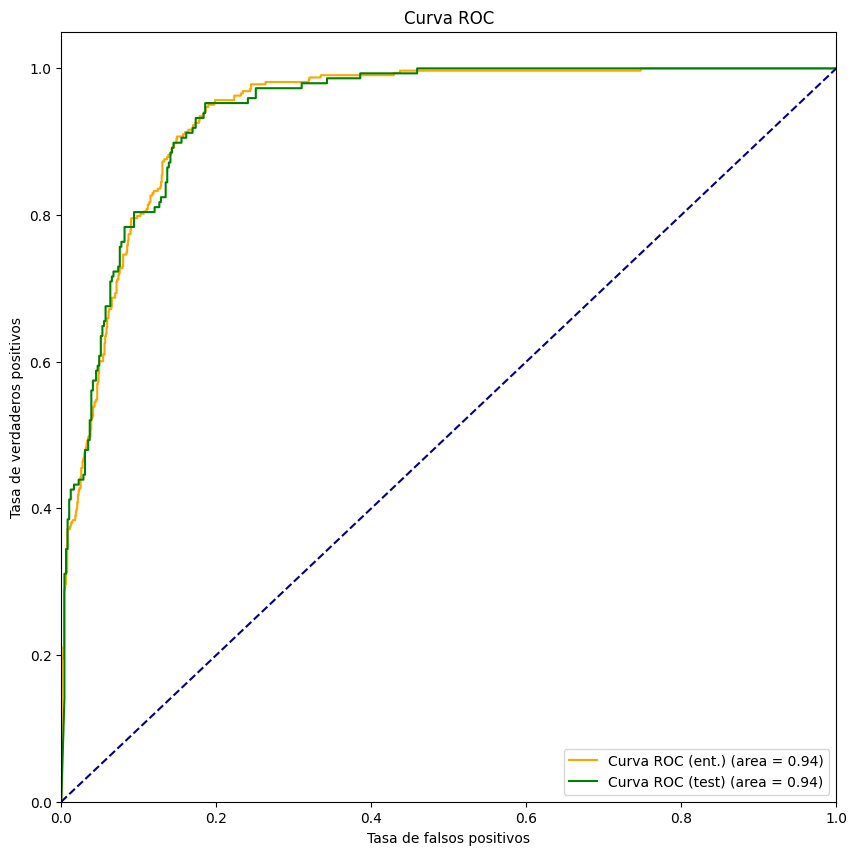

In [31]:
#Creamos la gráfica para representar los valores

plt.figure(figsize=(10,10))

plt.plot(fpr_train, tpr_train, color='orange',
         label='Curva ROC (ent.) (area = {})'.format(round(roc_auc_train,2)))
plt.plot(fpr_test, tpr_test, color='green',
         label='Curva ROC (test) (area = {})'.format(round(roc_auc_test,2)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Vemos que en este caso, con una distribución de 60% para el conjunto de entramiento y 30% del conjunto de datos para el conjunto de test, obntenemos un área bajo la curva de 0.94, lo que muestra un fuerte valor predictor del modelo, y además no presenta sobreajuste para la distribución de datos dada, ya que el área para ambos conjuntos es el mismo.